In [1]:
### Load the houseprices data from Thinkful's database.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [6]:
### Split your data into train and test sets.
### Estimate your model from the previous lesson in the training 
### set. Assess the goodness of fit of your model.

house_df = pd.concat([house_df,pd.get_dummies(house_df.centralair, prefix = "centralair", drop_first = True)], axis = 1)
dummy_column_names = list(pd.get_dummies(house_df.centralair, prefix = "centralair", drop_first = True).columns)
Y = house_df['saleprice']
X = house_df[['overallqual', 'grlivarea', 'totalbsmtsf', 'firstflrsf'] + dummy_column_names]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 37)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     855.3
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:55:22   Log-Likelihood:                -17543.
No. Observations:                1460   AIC:                         3.510e+04
Df Residuals:                    1454   BIC:                         3.513e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.197e+05   5803.182    -20.632      0.000   -1.31e+05   -1.08e+05
overallqual   2.762e+04   1048.864     26.335      0.000    2.56e+04    2.97e+04
grlivarea       46.9016      2.760     16.990      0.000      41.487      52.317
totalbsmtsf     24.5082      4.447      5.511      0.000      15.785      33.232
firstflrsf      17.0189      5.160      3.299      0.001       6.898      27.140
centralair_Y  8232.8635   2229.106      3.693      0.000    3860.257    1.26e+04
centralair_Y  8232.8635   2229.106      3.693      0.000    3860.257    1.26e+04
==============================================================================
Omnibus:                      491.366   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43573.793
Skew:                          -0.594   Prob(JB):                         0.00
Kurtosis:                      29.737   Cond. No.                     2.25e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.51e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

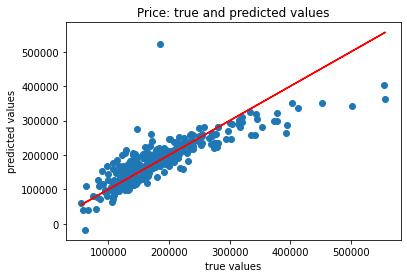

Mean absolute error of the prediction is: 27778.555531771344
Mean squared error of the prediction is: 1807516625.4868054
Root mean squared error of the prediction is: 42514.89886483097
Mean absolute percentage error of the prediction is: 16.44959456799985


In [7]:
### Predict the house prices in the test set, and evaluate the 
### performance of your model using the metrics previously mentioned
### in this lesson.

### Is the performance of your model satisfactory? Why or why not?

X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Price: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [8]:
### Try to improve your model in terms of predictive performance by adding or removing some variables.

house_df['totalsf'] = house_df['totalbsmtsf'] + house_df['firstflrsf'] + house_df['secondflrsf']
Y = np.log1p(house_df['saleprice'])
X = house_df[['overallqual', 'grlivarea', 'garagecars', 'totalsf'] + dummy_column_names]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 37)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1251.
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:57:13   Log-Likelihood:                 486.36
No. Observations:                1460   AIC:                            -960.7
Df Residuals:                    1454   BIC:                            -929.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.4374      0.024    429.135      0.000      10.390      10.485
overallqual      0.1181      0.005     24.278      0.000       0.109       0.128
grlivarea     8.361e-05    1.8e-05      4.645      0.000    4.83e-05       0.000
garagecars       0.1095      0.008     13.945      0.000       0.094       0.125
totalsf          0.0001   1.25e-05     10.652      0.000       0.000       0.000
centralair_Y     0.1088      0.010     11.210      0.000       0.090       0.128
centralair_Y     0.1088      0.010     11.210      0.000       0.090       0.128
==============================================================================
Omnibus:                      858.130   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24742.593
Skew:                          -2.207   Prob(JB):                         0.00
Kurtosis:                      22.679   Cond. No.                     3.37e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

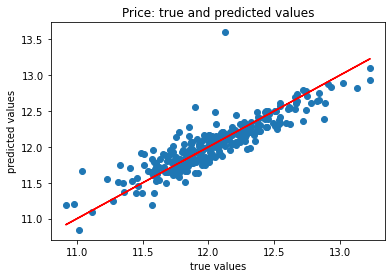

Mean absolute error of the prediction is: 0.12705196513016398
Mean squared error of the prediction is: 0.03399700037040336
Root mean squared error of the prediction is: 0.18438275507867694
Mean absolute percentage error of the prediction is: 1.0595568225035596


In [9]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Price: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [10]:
# The prediction values are all substantially lower than the previous model. Which lines up with the previous indivations
# that this model is an imporvement on the previous one.